'Before Filtering the shape (1107221, 36)'

'After Filter the shape (64952, 36)'

'Desire Filter shape (64952, 18)'

Schema([('Person_Serial_No', Int16),
        ('Relation_to_Head', Int16),
        ('Gender', Int16),
        ('Age', Int16),
        ('Marital_Status', Int16),
        ('Education_Level', Int16),
        ('Years_of_Education', Int16),
        ('Used_Internet_Last_30_Days', Int16),
        ('Days_Away_From_Home_Last_30_Days', Int16),
        ('Meals_Usually_Taken_Per_Day', Int16),
        ('Meals_From_School', Int16),
        ('Meals_From_Employer', Int16),
        ('Meals_Other', Int16),
        ('Meals_On_Payment', Int16),
        ('Meals_At_Home', Int16),
        ('Revisit_Status', Int16),
        ('FDQ_Original_Member', Int16),
        ('Multiplier', Int16)])

Percentage of null values 
Person_Serial_No ---> 0.00%
Relation_to_Head ---> 0.00%
Gender ---> 0.00%
Age ---> 0.00%
Marital_Status ---> 0.00%
Education_Level ---> 0.00%
Years_of_Education ---> 26.20%
Used_Internet_Last_30_Days ---> 3.94%
Days_Away_From_Home_Last_30_Days ---> 0.14%
Meals_Usually_Taken_Per_Day ---> 0.18%
Meals_From_School ---> 83.57%
Meals_From_Employer ---> 88.08%
Meals_Other ---> 79.19%
Meals_On_Payment ---> 85.59%
Meals_At_Home ---> 0.40%
Revisit_Status ---> 0.00%
FDQ_Original_Member ---> 0.14%
Multiplier ---> 91.12%


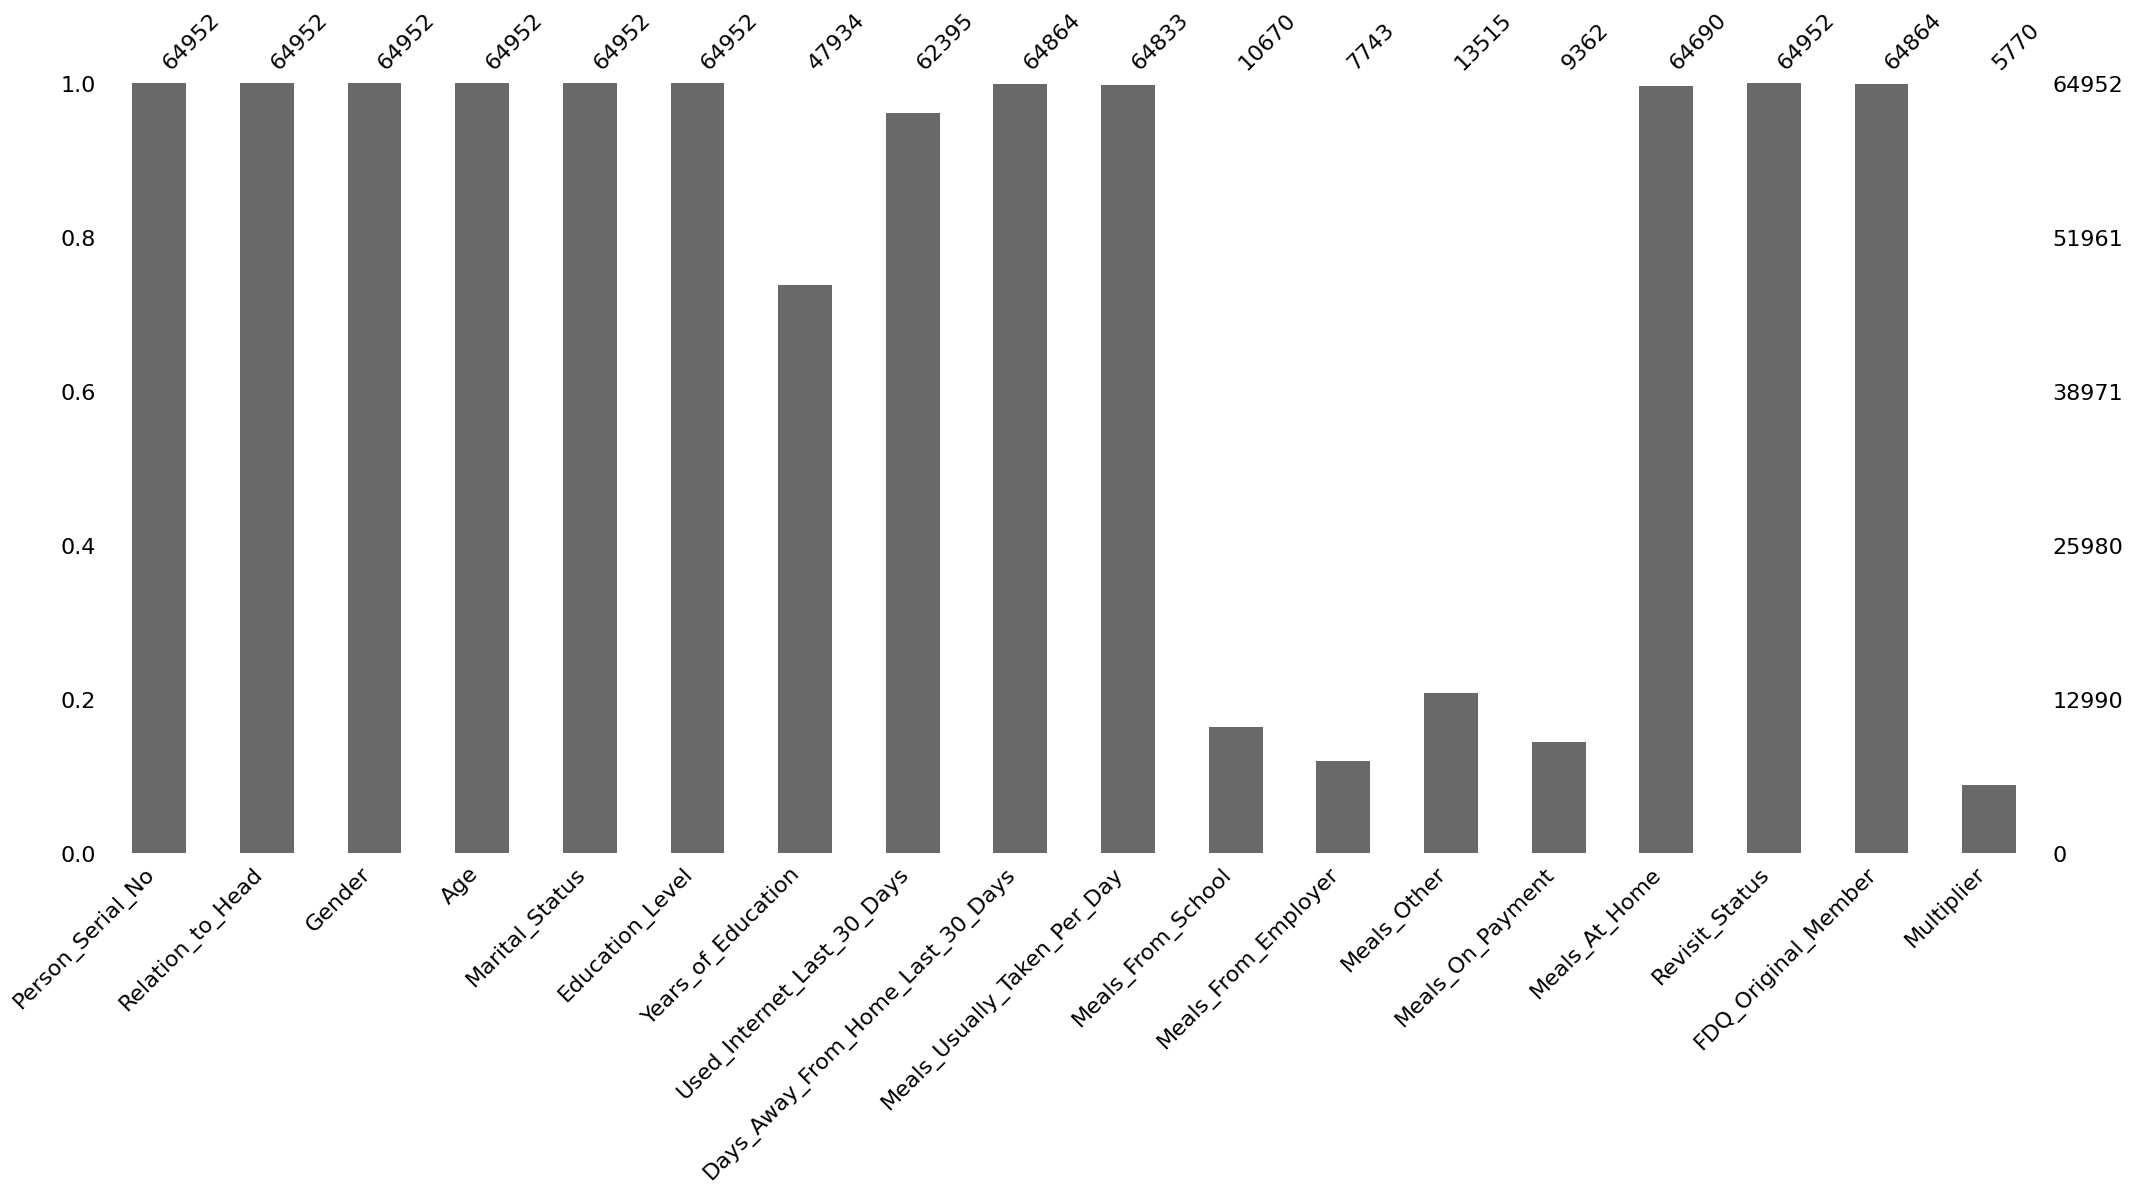

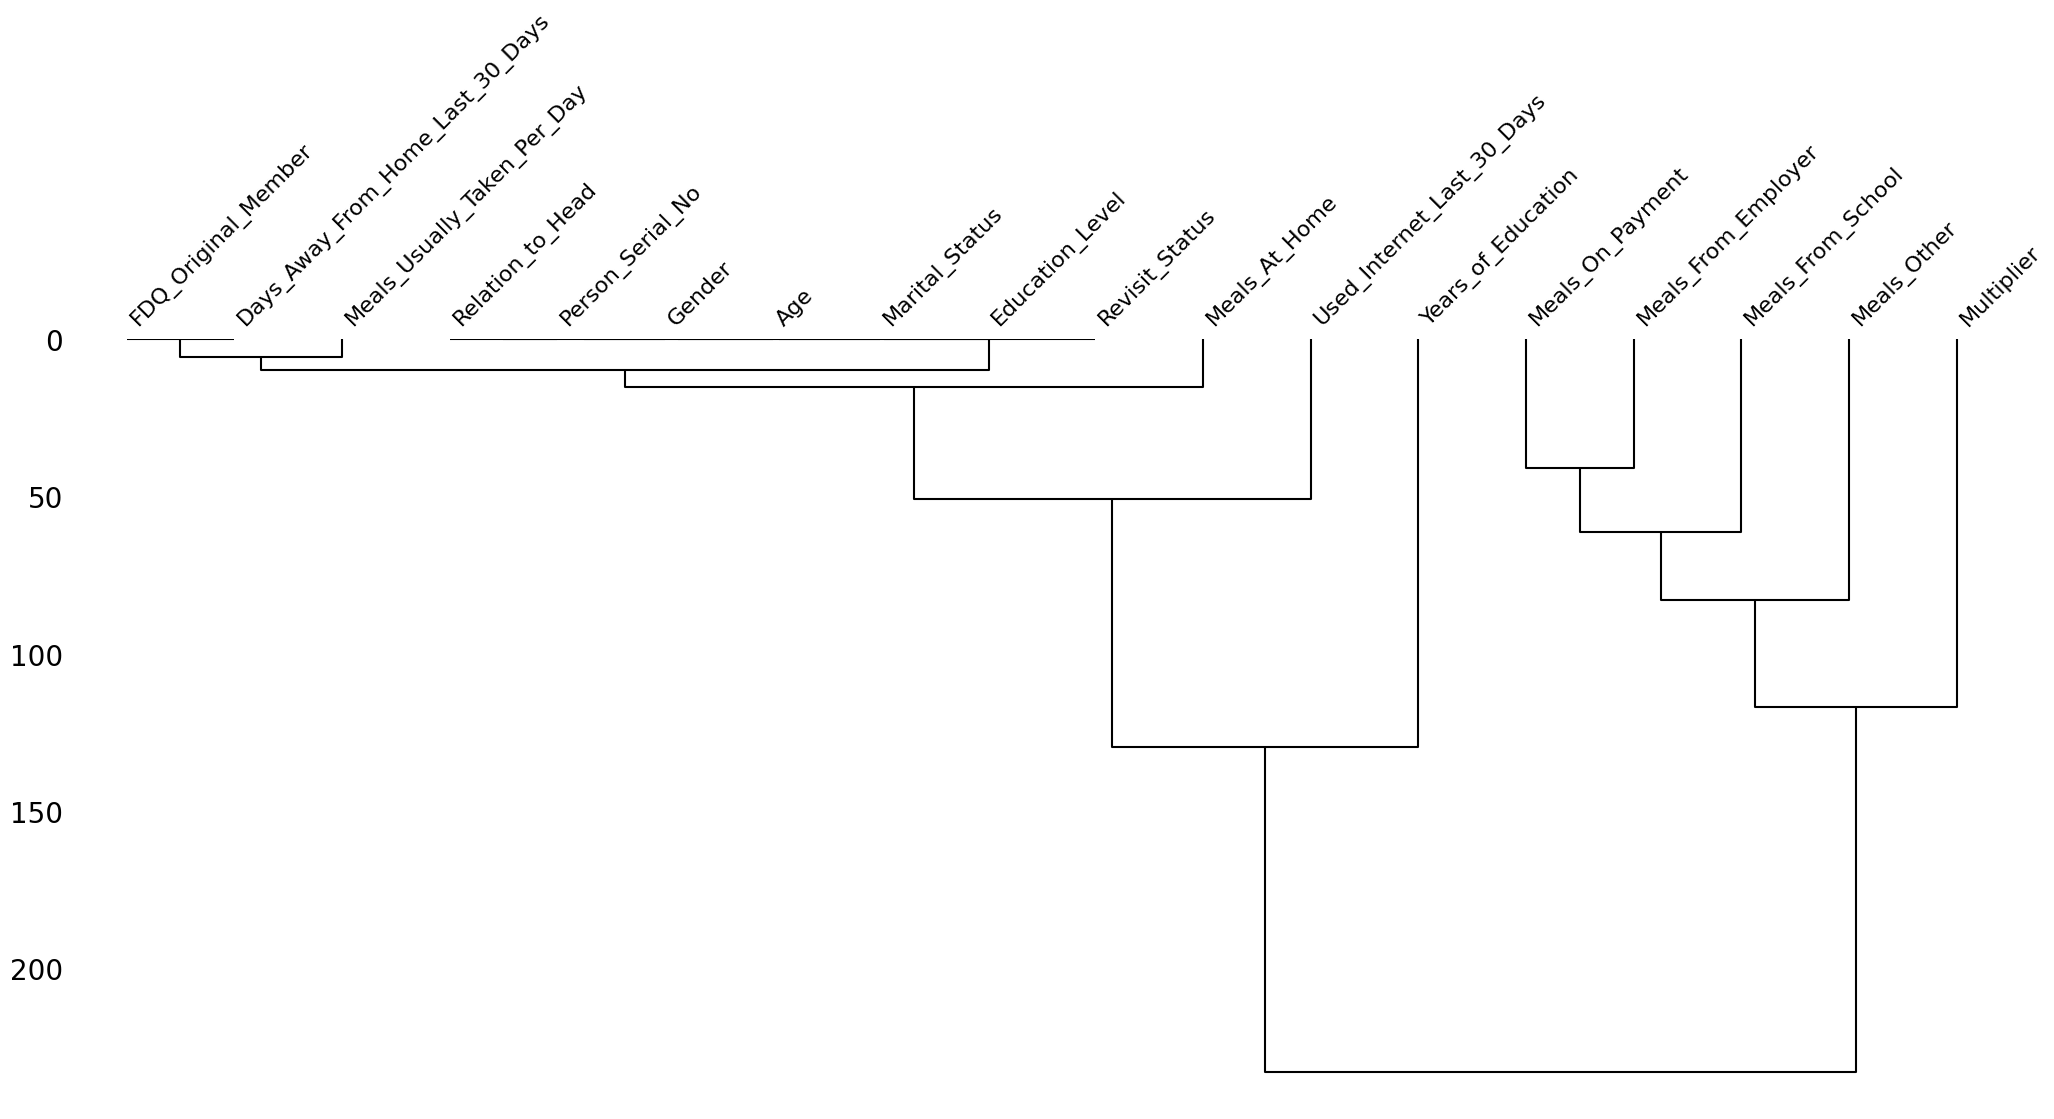

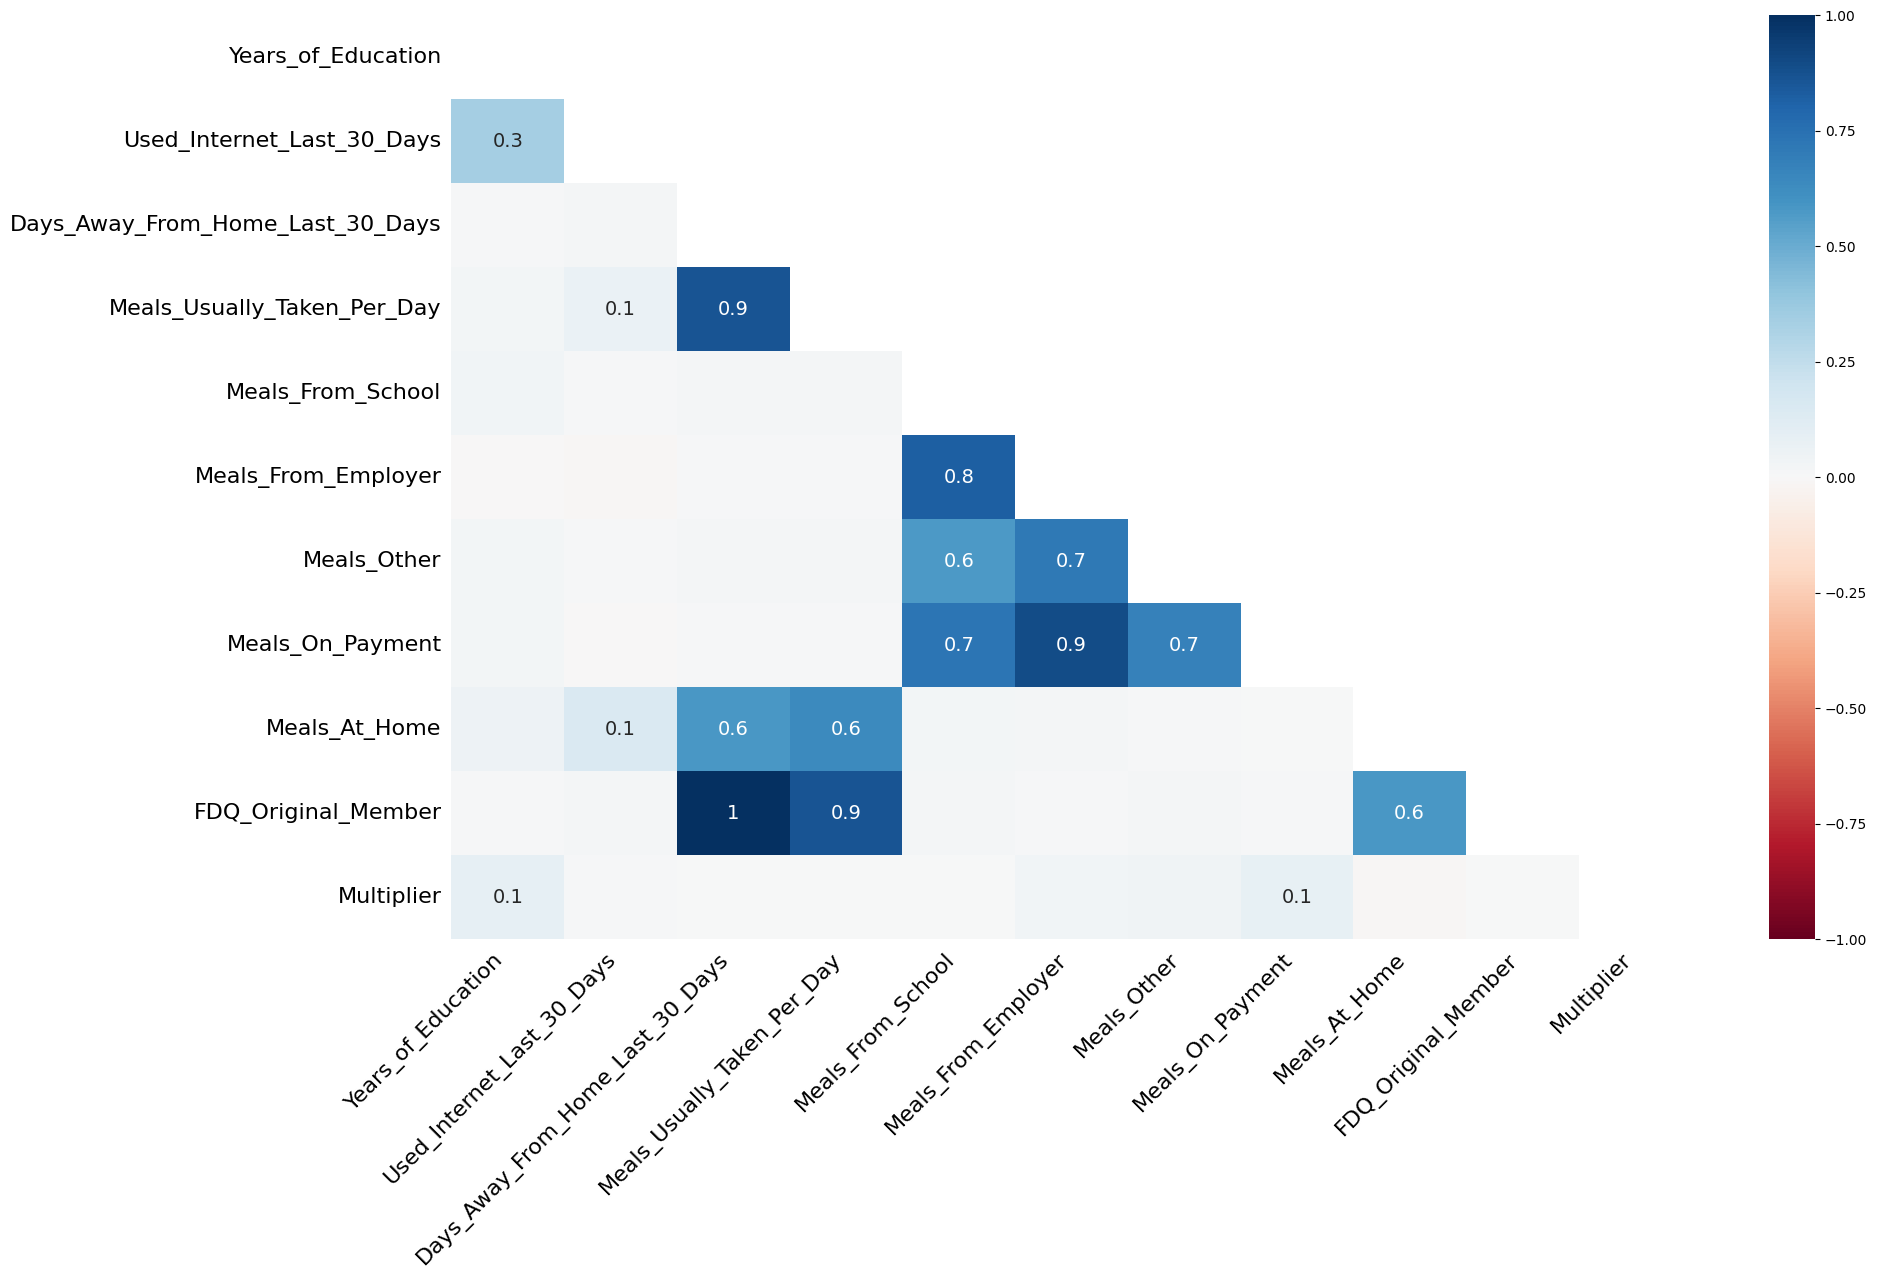

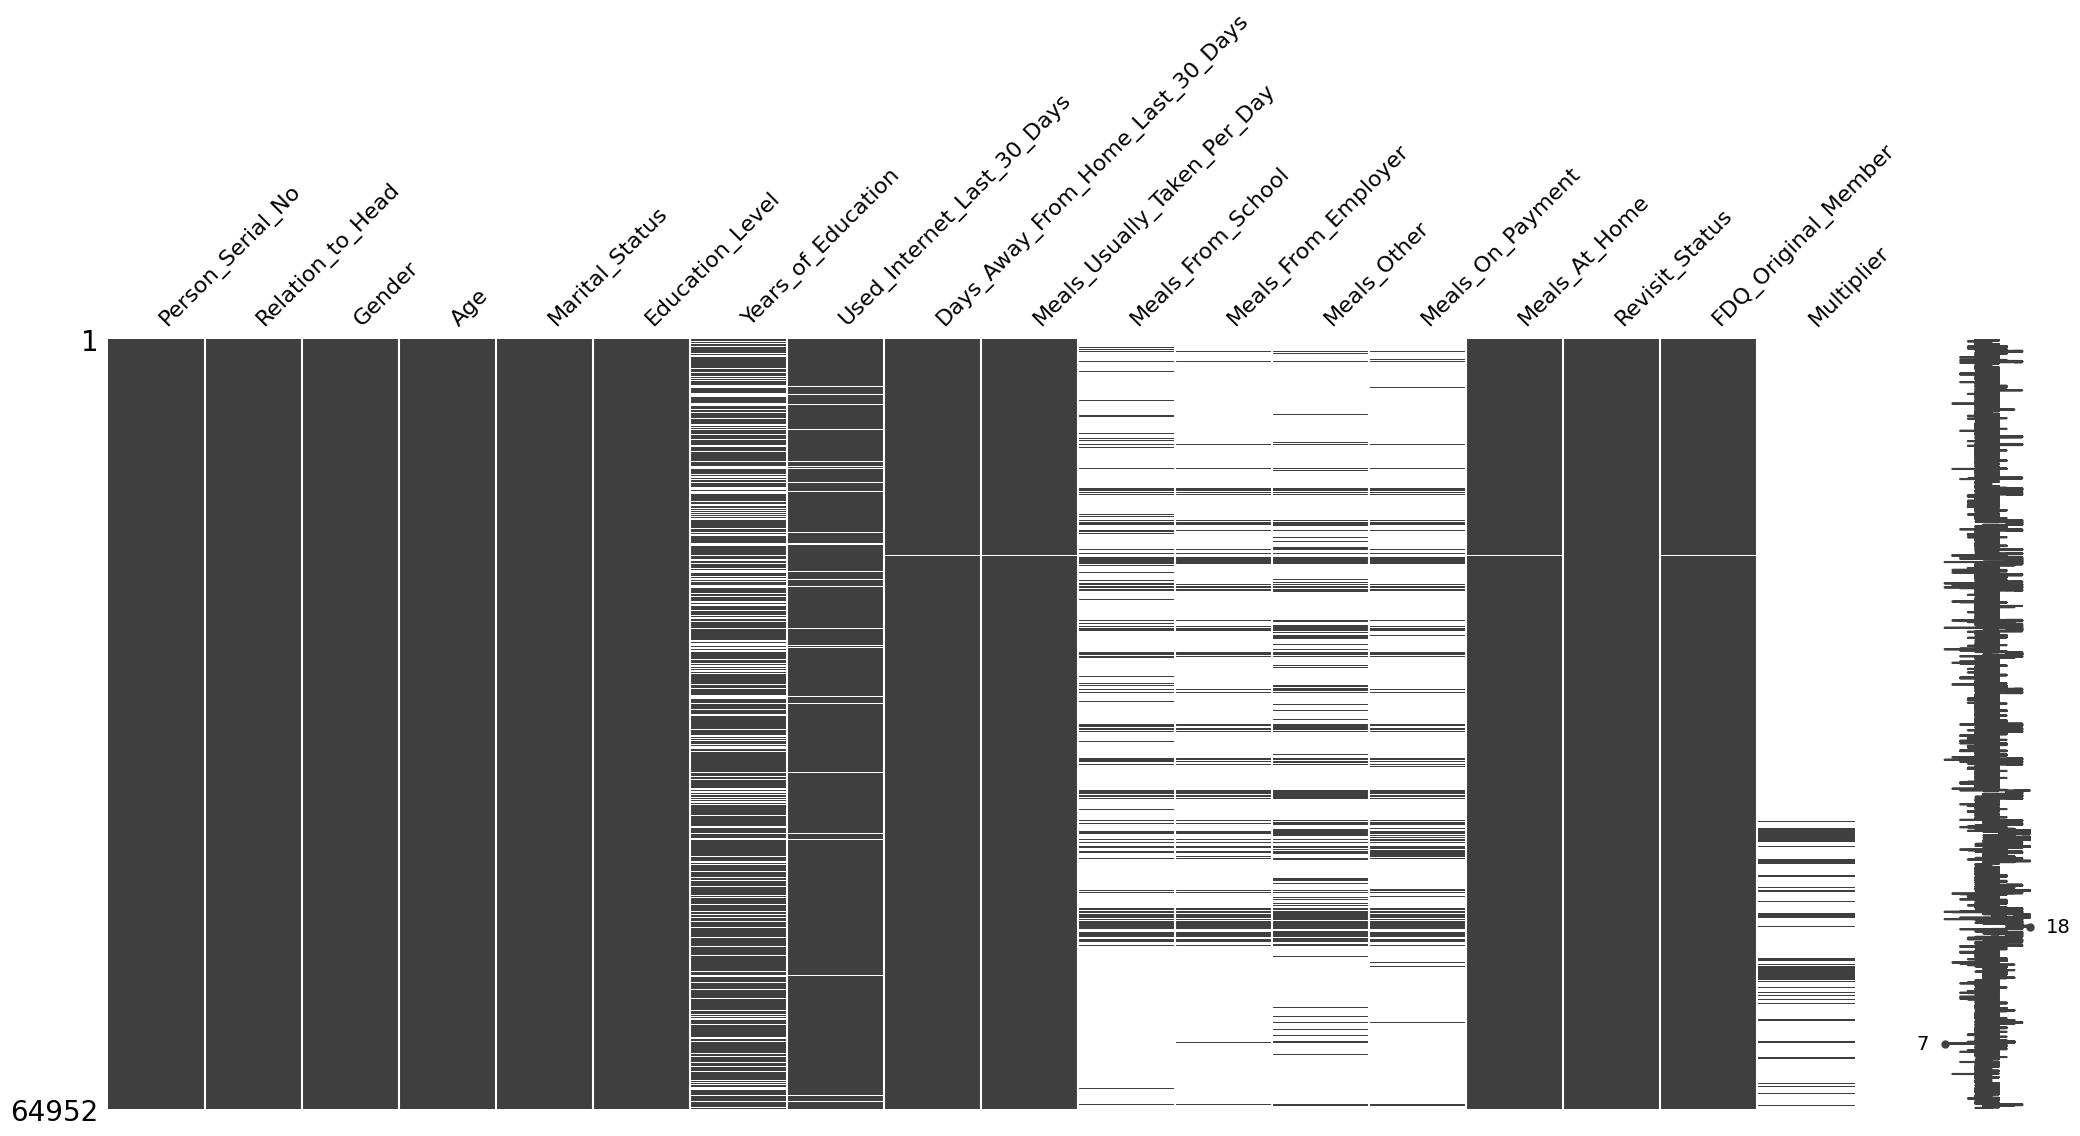

In [2]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data\lev-02_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================
cols = [ 'Person_Serial_No' ,
'Relation_to_Head',
'Gender',
'Age',
'Marital_Status',
'Education_Level',
'Years_of_Education',
'Used_Internet_Last_30_Days',
'Days_Away_From_Home_Last_30_Days',
'Meals_Usually_Taken_Per_Day',
'Meals_From_School',
'Meals_From_Employer',
'Meals_Other',
'Meals_On_Payment',
'Meals_At_Home',
'Revisit_Status',
'FDQ_Original_Member',
'Multiplier'
]

pdf = pdf[cols]
display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)